In [1]:
import pandas as pd
import matplotlib.pyplot as plt

filenames =  !ls ../sub_data
filenames = ['../sub_data/'+name for name in filenames]

../sub_data/Schizophrenia_Alzheimerl_List_Alls.xlsx - AD_1yr.csv
../sub_data/Schizophrenia_Alzheimerl_List_Alls.xlsx - AD_baseline.csv
../sub_data/Schizophrenia_Alzheimerl_List_Alls.xlsx - CN_1yr.csv
../sub_data/Schizophrenia_Alzheimerl_List_Alls.xlsx - CN_baseline.csv
../sub_data/Schizophrenia_Alzheimerl_List_Alls.xlsx - MCI_1yr.csv
../sub_data/Schizophrenia_Alzheimerl_List_Alls.xlsx - MCI_baseline.csv
../sub_data/Schizophrenia_Alzheimerl_List_Alls.xlsx - Normal.csv
../sub_data/Schizophrenia_Alzheimerl_List_Alls.xlsx - Schizophrenia.csv


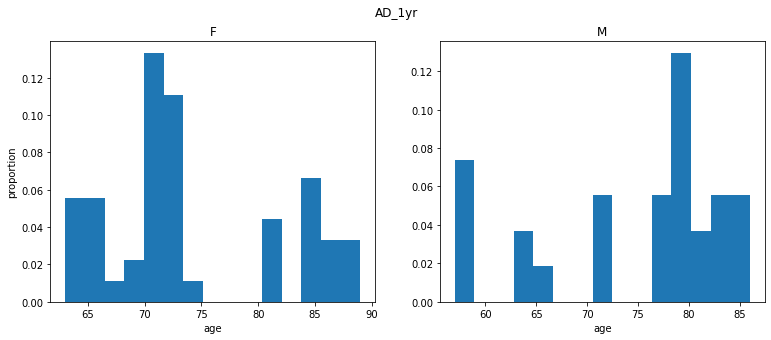

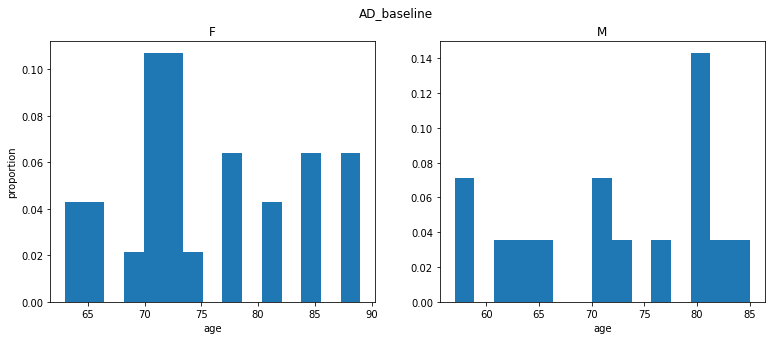

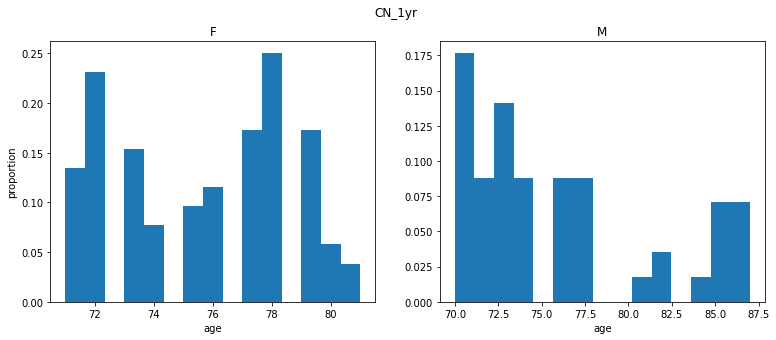

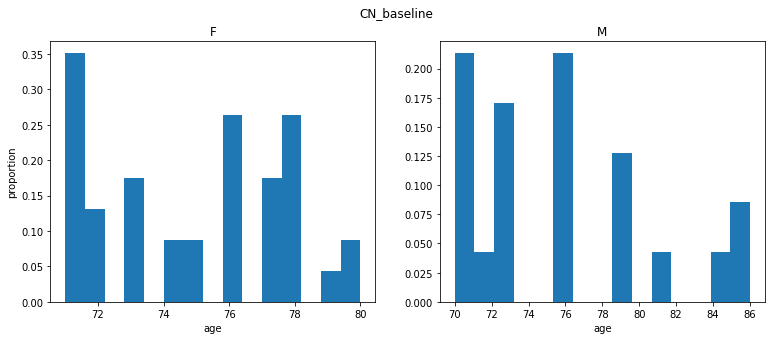

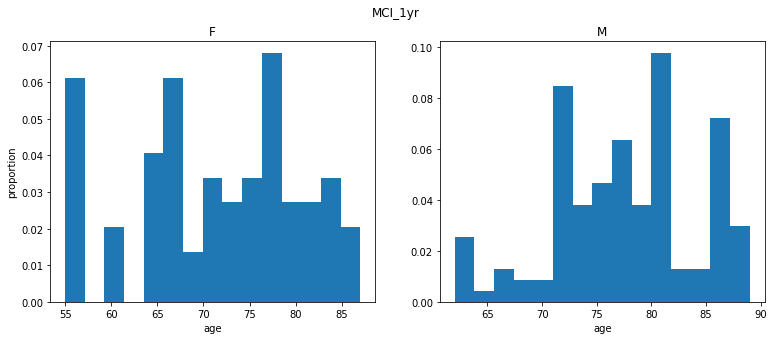

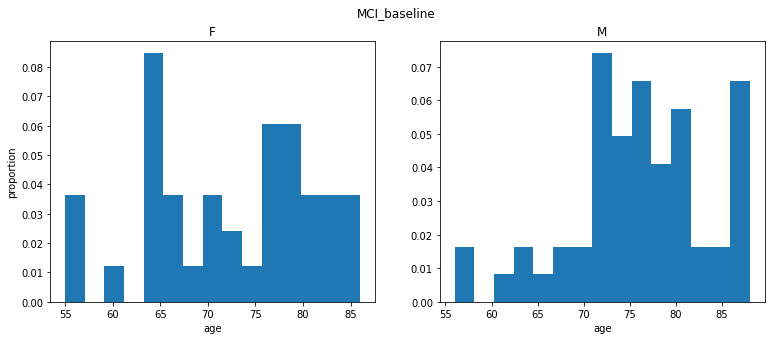

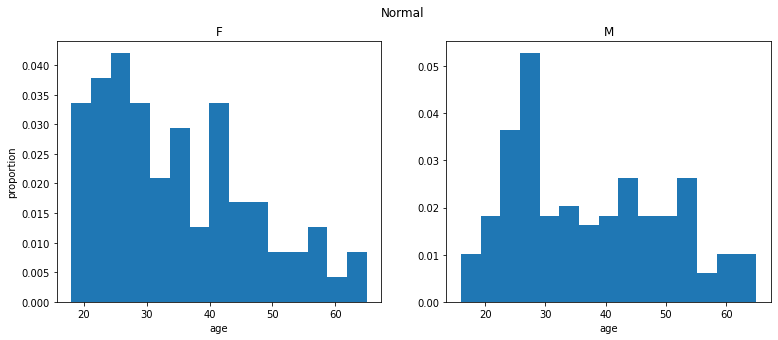

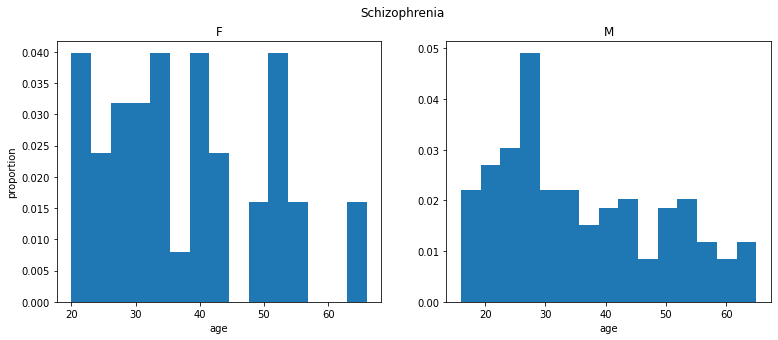

In [2]:
for name in filenames:
    print(name)
    df = pd.read_csv(name)
    # remove duplicate sub ids rows
    df.drop_duplicates(['Subject', 'Age', 'Sex'])

    title = name.split(' - ')[-1].replace('.csv', '')
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=[12.8,4.8])
    f.suptitle(title)

    ax1.hist(df[df['Sex']=='F']['Age'], density=True, bins=15)
    ax1.set_title('F')
    ax1.set_ylabel('proportion')
    ax1.set_xlabel('age')
    ax2.hist(df[df['Sex']=='M']['Age'], density=True, bins=15)
    ax2.set_title('M')
    ax2.set_xlabel('age')


In [3]:
import numpy as np
from sklearn.utils import resample

def resample_balanced(volume_filename: str):
    volumes = pd.read_csv(volume_filename)

    # add other label format
    volumes["Target"] = volumes["Target"].astype('category')
    volumes['Target_cat'] = volumes['Target'].cat.codes 


    # Subsampling from the dataset 
    # Creating the Minority
    volumes['Target'].value_counts()
    df_minority = volumes[volumes.Target=='AD']
    df_minority

    #Creating a Majority for CN 
    df_CN = volumes[volumes.Target=='CN']
    # Downsample majority class
    cn_sampled = resample(df_CN, 
                                    replace=False,    # sample without replacement
                                    n_samples=76,     # to match minority class
                                    random_state=123) # reproducible results


    #Creating a Majority for MCI 
    df_MCI = volumes[volumes.Target=='MCI']
    # Downsample majority class
    mci_sampled = resample(df_MCI, 
                                    replace=False,    # sample without replacement
                                    n_samples=76,     # to match minority class
                                    random_state=123) # reproducible results

    #Creating a Majority for MCI 
    df_SPR = volumes[volumes.Target=='SPR']
    # Downsample majority class
    spr_sampled = resample(df_SPR, 
                                    replace=False,    # sample without replacement
                                    n_samples=76,     # to match minority class
                                    random_state=123) # reproducible results

    

    # creating a new df with subsampled dfs
    pdList = [cn_sampled, mci_sampled, spr_sampled]  # List of your dataframes
    df_majority = pd.concat(pdList)
    df_majority["Target"].value_counts()


    # Combine minority class with downsampled majority class
    df_downsampled = pd.concat([df_minority, df_majority])


    limited = df_downsampled
    limited = limited.drop(columns=['Target', 'Target_cat'])


    return limited, df_downsampled


In [4]:
_, df = resample_balanced('../VolumeVoxel_df.csv')

In [9]:
df = pd.read_csv('../VolumeVoxel_df.csv')

In [10]:
found_sub = []
for sub_id in df['Patient']:
    l = []
    for name in filenames:
        with open(name) as myfile:
             l.append(sub_id in myfile.read())
    found_sub.append(any(l))

In [11]:
sum(int(s) for s in found_sub)

448

In [12]:
len(found_sub)

871

In [14]:
len(df.iloc[found_sub][df['Target'] == 'SPR'])

/home/adrien/MRI-classifier/shapenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


221